# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
expon_rv = sts.expon()
sample = expon_rv.rvs(100)
sample

array([4.43818232e-02, 4.00784954e-01, 5.24140237e-01, 3.03108974e-01,
       2.48759113e-02, 9.36142165e-01, 5.41803291e+00, 2.67856826e+00,
       2.46672946e-01, 1.12978358e+00, 6.88538644e-01, 7.27717529e-01,
       2.59278230e-01, 9.96639567e-01, 2.76314085e-01, 2.02155477e+00,
       2.09616668e+00, 1.18858249e+00, 7.41478160e-01, 2.88570239e-01,
       1.49407741e+00, 7.35186022e-01, 1.73276982e+00, 1.45803574e-01,
       5.28326064e-01, 1.76296426e+00, 6.82102480e-01, 1.18726092e+00,
       2.63830375e+00, 1.58844961e-02, 4.03774687e-01, 2.18154555e-01,
       7.88749746e-01, 3.14919557e-01, 8.70664199e-01, 1.16529407e+00,
       2.04978759e+00, 2.25543133e+00, 1.02971115e+00, 1.47397430e-01,
       1.11608847e+00, 1.16937386e+00, 2.28556600e+00, 1.85331242e+00,
       5.68580392e-01, 1.91482688e+00, 8.10899440e-01, 6.53786983e-01,
       3.10141269e-01, 3.77018298e-02, 3.18823894e-01, 1.89943752e-01,
       1.63426043e-01, 2.76628272e+00, 1.98251670e-02, 1.12936281e+00,
      

In [3]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины

In [4]:
real_var = expon_rv.var() # настоящая дисперсия случайной величины

In [5]:
real_std = expon_rv.std() # настоящее стандартное отклонение случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

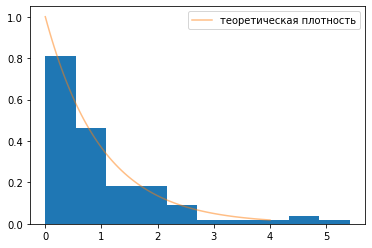

In [6]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,4,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.9789913946559905
1.162131310787385


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

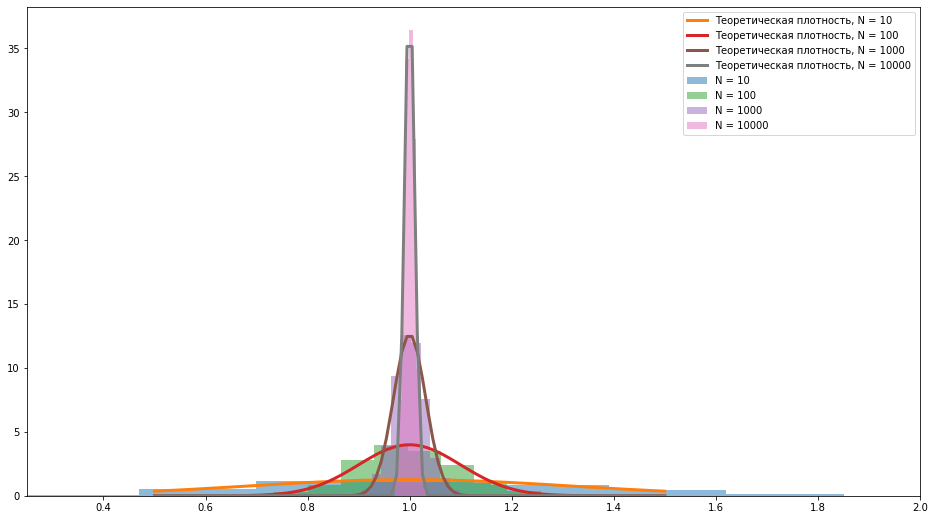

In [8]:
# ваш код тут
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(expon_rv.rvs(N)))
    plt.hist(means, alpha=0.5, density=True, label=f'N = {N}')
    norm_rv = sts.norm(loc=real_mean, scale=real_std / np.sqrt(N))
    x = np.linspace(0.5,1.5, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label=f'Теоретическая плотность, N = {N}', linewidth=3)


    
plt.legend()
plt.xlim((0.25, 2))

plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

С увеличением выборки распределение выборочных средних апроксимирует все лучше и лучше теоритическое распределение.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [9]:
df_telecom = pd.read_csv('https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8')
df_telecom = df_telecom[['total day calls', 'churn']]

In [10]:
churn_false = df_telecom.query('churn == False')['total day calls']
churn_true = df_telecom.query('churn == True')['total day calls']

In [41]:
N = 100
means_false_churn = []
for i in range(1000):
    means_false_churn.append(np.mean(np.random.choice(churn_false, N))) 
means_true_churn = []
for i in range(1000):
    means_true_churn.append(np.mean(np.random.choice(churn_true, N))) 

In [36]:
def confIntMean(a, conf=0.95):
    mean, sem, m = np.mean(a), np.std(a)/np.sqrt(N), sts.t.ppf((1+conf)/2., len(a)-1)
    return mean - m*sem, mean + m*sem

#### Доверительный интервал для churn = True

In [37]:
confIntMean(means_false_churn)

(99.91687801325004, 100.69186198674994)

In [44]:
_zconfint_generic(np.mean(means_false_churn), np.std(means_false_churn)/np.sqrt(N), alpha=0.05, alternative='two-sided')

(99.78608363727595, 100.57571636272404)

#### Доверительный интервал для churn = True

In [38]:
confIntMean(means_true_churn)

(100.86647690890398, 101.73718309109601)

In [45]:
_zconfint_generic(np.mean(means_true_churn), np.std(means_true_churn)/np.sqrt(N), alpha=0.05, alternative='two-sided')

(100.92457877361414, 101.77452122638584)